<a href="https://colab.research.google.com/github/luissaster/sin-492-reconhecimento-de-padroes/blob/main/SIN_492_Modelo_K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Montando o Google Drive do projeto.

In [ ]:
from google.colab import drive

if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')
else:
    print("O drive já está montado em /content/drive/MyDrive")

O drive já está montado em /content/drive/MyDrive


Execução do modelo K-NN.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Importando o arquivo .csv
df = pd.read_csv('/content/drive/MyDrive/database')

# Diretório para salvar as visualizações.
EXP_PATH = '/content/drive/MyDrive/knnresults'
if not os.path.exists(EXP_PATH):
    os.makedirs(EXP_PATH)

# Separando as features e o target
X = df.loc[:, 'feature0':'feature15']
y = df['target']

# Normalizando os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Procurando o melhor valor de k
best_k = 0
best_accuracy = 0
accuracy_list = []
f1_scores = []

for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    f1_scores.append(f1)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Treinando o modelo com o melhor valor encontrado para k
knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(X_train, y_train)

# Resultados úteis
y_pred = knn.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

print(f'Melhor valor de k: {best_k}')
print(f'Melhor Acurácia: {best_accuracy:.4f}')

Melhor valor de k: 40
Melhor Acurácia: 0.7021


Matriz de Confusão:
 [[19 25]
 [ 3 47]]


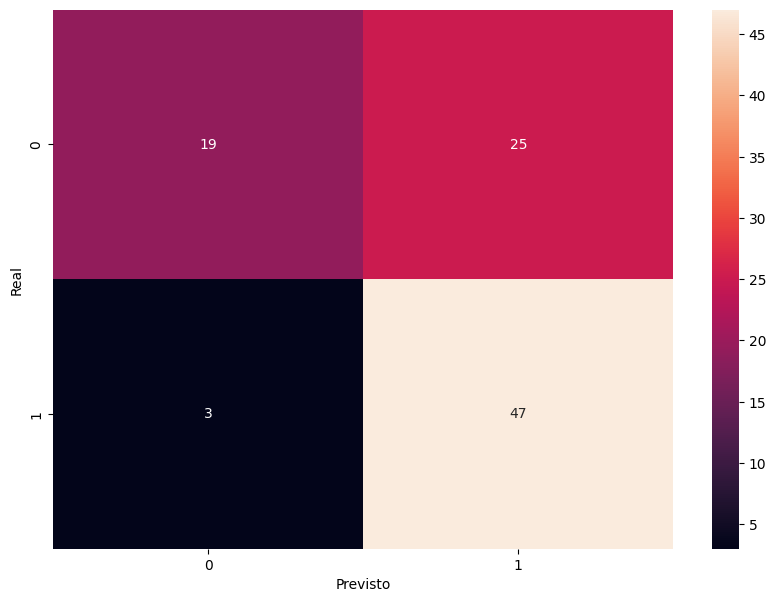

In [ ]:
# Matriz de confusão
print(f'Matriz de Confusão:\n {confusion}')
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.savefig(os.path.join(EXP_PATH, 'knn_confusion_matrix.pdf'))
plt.show()

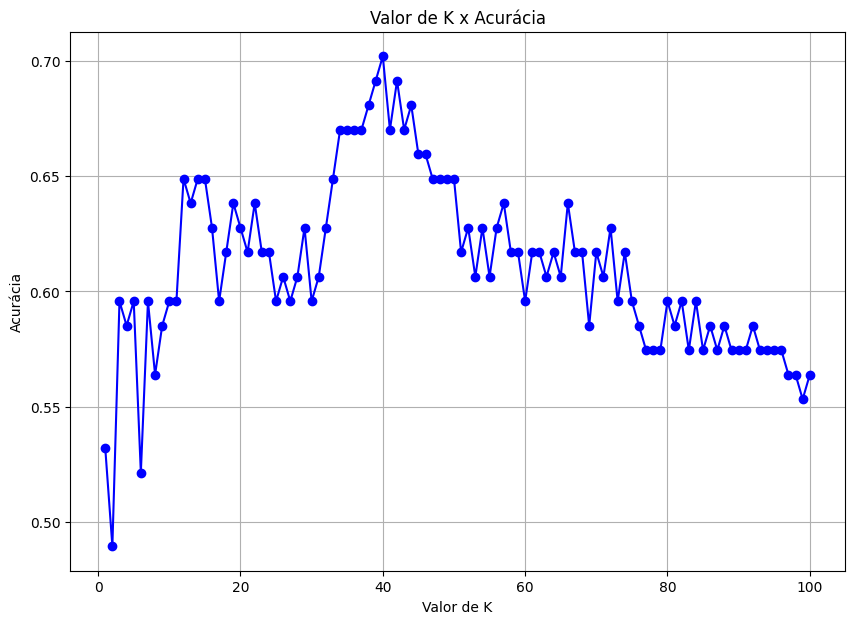

In [ ]:
# Gráfico de K x Acurácia
plt.figure(figsize=(10, 7))
plt.plot(range(1, 101), accuracy_list, marker='o', linestyle='-', color='b')
plt.title('Valor de K x Acurácia')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
plt.grid(True)
plt.savefig(os.path.join(EXP_PATH, 'knn_accuracy_plot.pdf'))
plt.show()

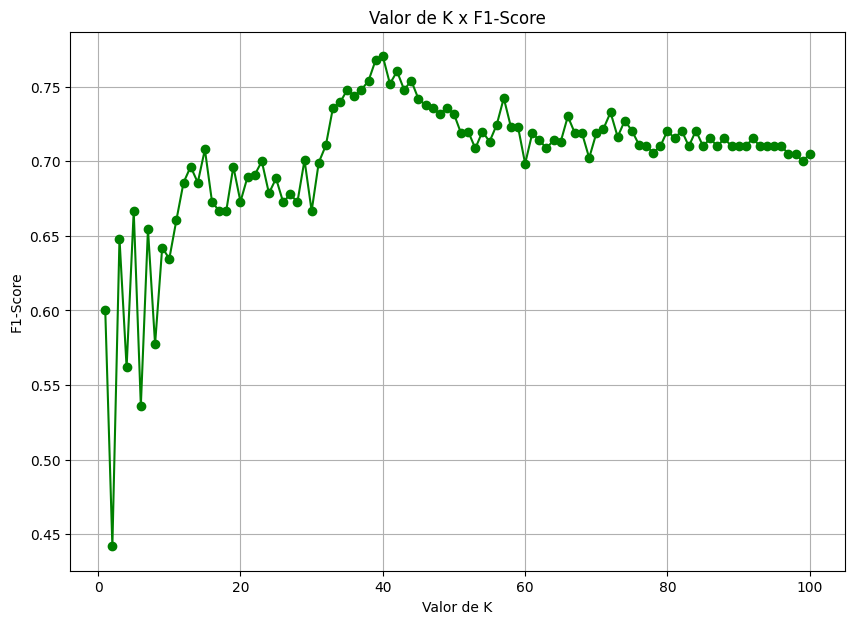

In [ ]:
# Gráfico de K x F1-Score
plt.figure(figsize=(10, 7))
plt.plot(range(1, 101), f1_scores, marker='o', linestyle='-', color='green')
plt.title('Valor de K x F1-Score')
plt.xlabel('Valor de K')
plt.ylabel('F1-Score')
plt.grid(True)
plt.savefig(os.path.join(EXP_PATH, 'knn_f1_score_plot.pdf'))
plt.show()

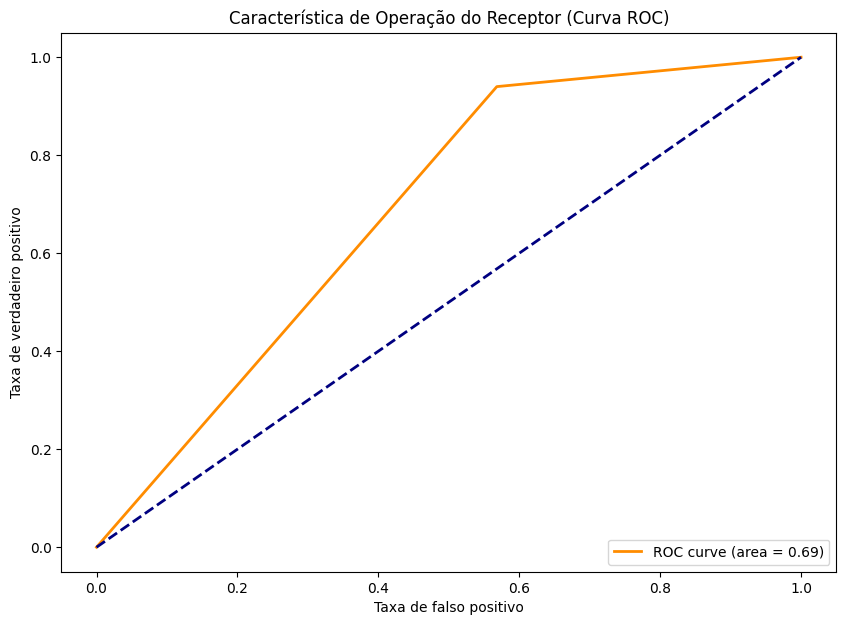

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Característica de Operação do Receptor (Curva ROC)')
plt.legend(loc='lower right')
plt.savefig(os.path.join(EXP_PATH, 'knn_roc_curve.pdf'))
plt.show()

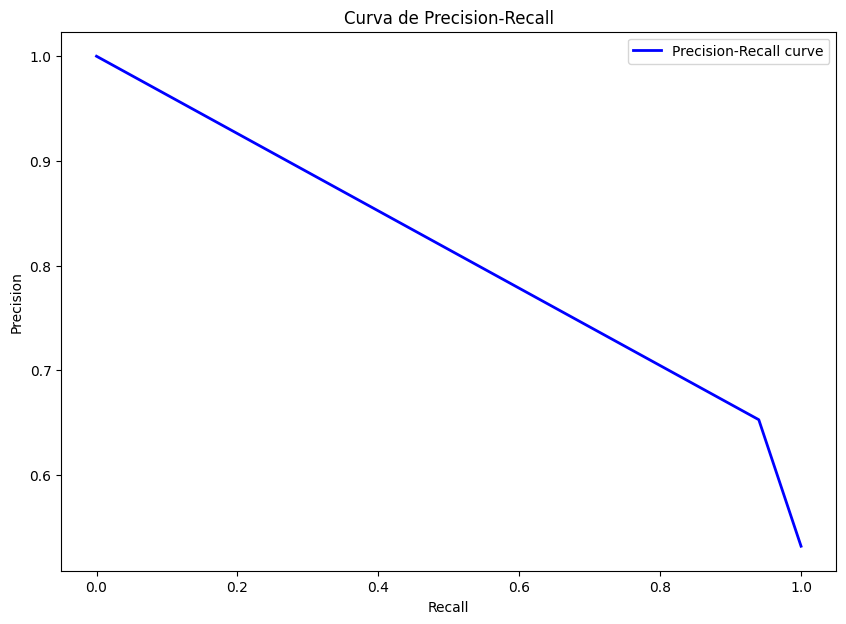

In [ ]:
# Curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precision-Recall')
plt.legend(loc='upper right')
plt.savefig(os.path.join(EXP_PATH, 'knn_precision_recall_curve.pdf'))
plt.show()

Execução de um Perceptron Simples.

Acurácia do Perceptron: 0.62
Matriz de Confusão Perceptron:
 [[25 19]
 [17 33]]


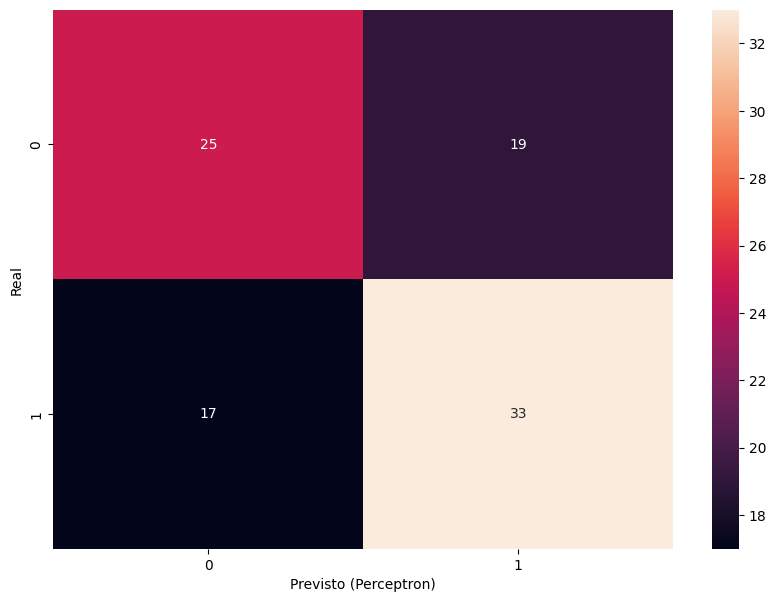

In [ ]:
# Treinando o modelo Perceptron
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)

# Obtendo os resultados do Perceptron
y_pred_perceptron = perceptron_model.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
confusion_perceptron = confusion_matrix(y_test, y_pred_perceptron)

print(f'Acurácia do Perceptron: {accuracy_perceptron:.2f}')
print(f'Matriz de Confusão Perceptron:\n {confusion_perceptron}')

# Visualização da Matriz de Confusão do Perceptron
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_perceptron, annot=True)
plt.xlabel('Previsto (Perceptron)')
plt.ylabel('Real')
plt.savefig(os.path.join(EXP_PATH, 'perceptron_confusion_matrix.pdf'))
plt.show()
